#Starting up

In [13]:
import numpy as np
import scipy.stats as ss
import scipy.optimize
import matplotlib.pyplot as plt

# iPython magic command for inline figures. If this command is not given, figures are generated in windows.
# An asterisk appears in the cell prompt (i.e. "In [*]:"), and the kernel stalls until the window is closed.
%matplotlib inline

## Below are two simple examples of exception handling

## Try to import pandas. If not existent, set flag = False, and raise an exception.
try:
    import pandas as pd
    pd_flag = True
except ImportError:
    print("Package pandas not found. Cannot do funky data structures!")
    pd_flag = False
    
## Try to import seaborn.
try:
    import seaborn as sns
    sns_flag = True
    sns.set_style("whitegrid")
    sns.set_style("ticks")
except ImportError:
    sns_flag = False
print("Does seaborn exist on the computer? " + str(sns_flag))

Does seaborn exist on the computer? True


# Correlations: Pearson's r and Spearman's rho

###  Computing the correlation coefficient

You have already seen the correlation coefficient calculated via Pearson's method ($r$).  We can also use `scipy.stats` to calculate Spearman's correlation coefficient, $\rho$.  We'll do this below by simulating two sets of correlated random numbers:

SpearmanrResult(correlation=0.83087635054021614, pvalue=8.2494704523884682e-14)
(0.91358975560554068, 2.1804158236341721e-20)


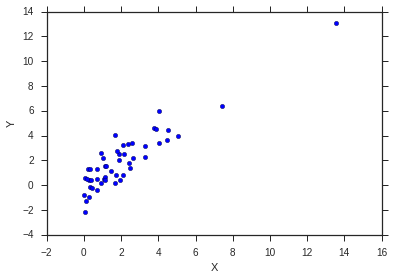

In [14]:
x = np.random.chisquare(2, size=50)
y = x + np.random.normal(size=50)

## Calculate Pearson's r and Spearman's rho for the data (x,y) and print them out, also plot the data:

spearr = ss.spearmanr(x,y)
pearr = ss.pearsonr(x,y)

print spearr
print pearr

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.show()



Note that the two methods give different values (including for the $p$-value).  <i>How can this be?</i> Surely the data are correlated or they are not, with a certain probability?  It is important to bear in mind that (as in all statistical tests) we are not really asking the question "Are the data correlated?" rather we are asking: assuming that the data are really uncorrelated, independent and identically distributed, what is the probability that we would see such a non-zero absolute value of <i>this particular test-statistic</i> by chance.  $r$ and $\rho$ are <i>different</i> test-statistics: they are optimised in different ways to spot deviations from random uncorrelated data.

Let's look at this difference between the two methods in more detail.  What happens when our data has certain properties, which might favour or disfavour one of the methods? 

###Comparing Pearson's $r$ and Spearman's $\rho$

First, let us consider the case where there is a cloud of data points with no underlying correlation, plus extreme outlier (as might be expected from some error in the experiment or data recording).  You may remember something like this as one of the four cases from "Anscombe's quartet" shown in the first lecture:

(0.99966180396492688, 9.5984296892605552e-78)
SpearmanrResult(correlation=-0.029243697478991592, pvalue=0.8402317555756762)


<function matplotlib.pyplot.show>

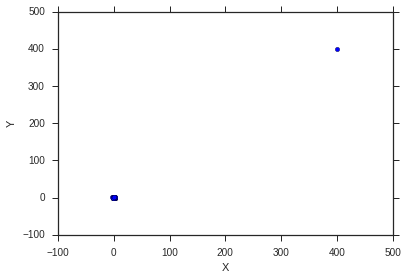

In [15]:
## First generate the random data: use the normal distribution to generate 50 data points which are uncorrelated 
## between x and y and then replace one with an outlier which implies a correlation, similar to that seen in 
## Anscombe's quartet (see lecture notes from Week 1)

np.random.seed(0)
x = np.random.normal(size=50)
y = np.random.normal(size=50)

x[40] = 400
y[40] = 400

## Now plot the data and compare Pearson's r and Spearman's rho and the associated p-values

pearr = ss.pearsonr(x,y)
spearr = ss.spearmanr(x,y)

print pearr
print spearr

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.show


# Linear regression

### Linear regression - generating and plotting the data

Here we just make and plot some fake data (with no randomisation). In the boxes below, we will see how to do linear
regression by hand and using built-in functions in numpy and scipy.

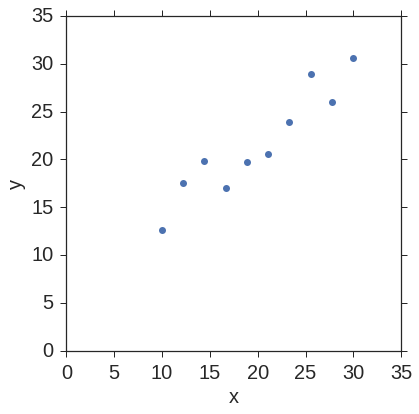

In [16]:
x = np.array([10.0, 12.2, 14.4, 16.7, 18.9, 21.1, 23.3, 25.6, 27.8, 30.0])
y = np.array([12.6, 17.5, 19.8, 17.0, 19.7, 20.6, 23.9, 28.9, 26.0, 30.6])

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(x, y, "o")
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0.0, 35.0)
ax.set_ylim(0.0, 35.0)
plt.show()

### Simple linear regression - the long way

Now we use the explicit calculation of the linear regression coefficients to plot the regression line
on top of the data.

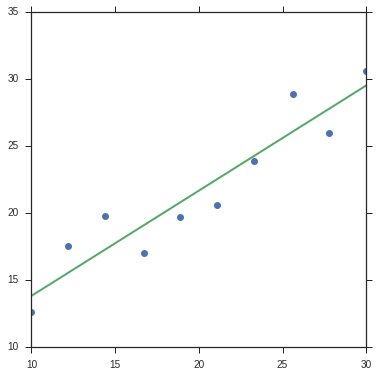

In [17]:
xm = np.mean(x)
ym = np.mean(y)

x2m = np.mean(x**2.)
xym = np.mean(y*x)

b = (xym - xm*ym)/(x2m - xm**2.)
a = ym - b*xm

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(x,y, "o");
ax.plot(x, a+b*x, lw=2);
plt.show()

### Simple linear regression, the short way

There are various ways to do this:
* using `np.polyfit()`
* using `scipy.optimize.curve_fit()`
* using seaborn's `regplot()` or `lmplot`. Note that this will automatically also draw 68%
confidence contours.

[ 0.78565834  5.9468331 ]


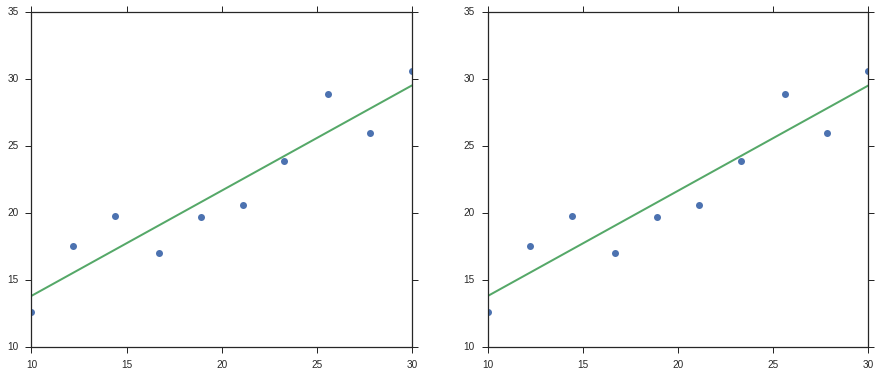

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

## first attempt: numpy.polyfit

r = np.polyfit(x,y,1)

ax1.plot(x,y,"o")
ax1.plot(x,r[0]*x+r[1],lw=2)


## second attempt: scipy.optimize.curve_fit
func = lambda x, a, b: x*a+b
r2, pcov = scipy.optimize.curve_fit(func, x,y, p0=(1,1))
print r2
ax2.plot(x,y, "o");
ax2.plot(x, r2[0]*x+r2[1], lw=2)

## fancy version with pandas and seaborn
##df = pd.DataFrame(np.transpose([x,y]), index=np.arange(len(x)), columns=["x", "y"])
##fig = plt.figure()
##sns.regplot("x", "y", df)
##plt.show()


### Linear regression of Reynolds' data

This uses the data in `reynolds.txt`. We can load this into Python very simply, then change
the units.

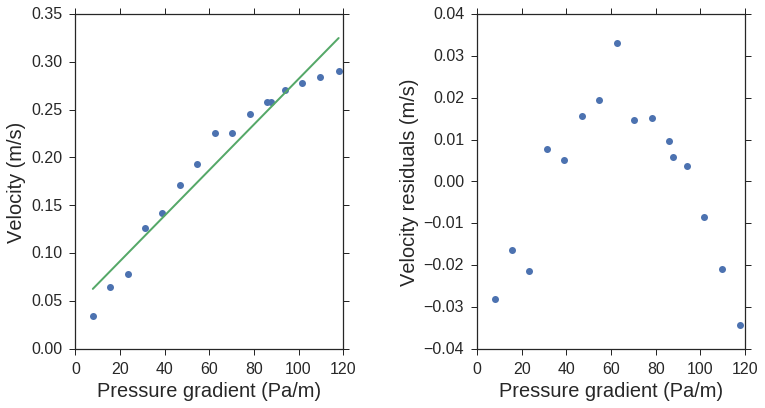

In [19]:
reynolds = np.genfromtxt ("reynolds.txt", dtype=np.float, names=["dP", "v"], skip_header=1, autostrip=True)

## change units
ppm = 9.80665e3
dp = reynolds["dP"]*ppm
v = reynolds["v"]

## save to new file:
np.savetxt("fluid.txt", np.transpose([dp, v]))
popt, pcov = scipy.optimize.curve_fit(func,dp, v)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6)); plt.subplots_adjust(wspace=0.5)
ax1.plot(dp, v, "o")
ax1.plot(dp, popt[0]*dp+popt[1], lw=2)
ax1.set_xlabel("Pressure gradient (Pa/m)", fontsize=20)

ax1.set_ylabel("Velocity (m/s)", fontsize=20)

ax2.plot(dp, v-(popt[0]*dp+popt[1]), "o")
ax2.set_xlabel("Pressure gradient (Pa/m)",fontsize=20)
ax2.set_ylabel("Velocity residuals (m/s)", fontsize=20)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=16)
    
plt.show()

### A closer look at Reynolds' data 

The fit doesn't quite work at high values of the Pressure gradient. We can exclude those data
points for now:

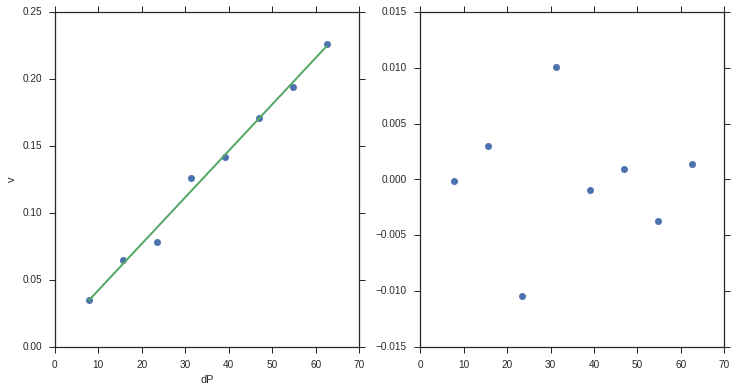

In [20]:
dp_red = dp[:8]
v_red = v[:8]

popt_red, pcov_red = scipy.optimize.curve_fit(func, dp_red, v_red)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(dp_red, v_red, "o")
ax1.plot(dp_red, popt_red[0]*dp_red+popt_red[1], lw=2)
ax1.set(xlabel="dP", ylabel="v")

ax2.plot(dp_red, v_red-(popt_red[0]*dp_red+popt_red[1]), "o")

plt.show()

### Numerical diagnostics of the Reynolds' data

We can compute various sums of squares for regression analysis:

In [21]:
sst = np.sum((v_red - np.mean(v_red))**2.)

prediction = popt_red[0]*dp_red+popt_red[1]

ssm = np.sum((prediction - np.mean(v_red))**2.)
sse = np.sum((v_red - prediction)**2.)
r2 = ssm/sst

print("(SSM+SSE)/SST: " + str((ssm+sse)/sst))
print("r: " + str(np.sqrt(r2)))
print(scipy.stats.pearsonr(dp_red, v_red))

(SSM+SSE)/SST: 0.999999999835
r: 0.996174242308
(0.99617424239049657, 1.3958713607042013e-07)


# Probability theory

### Random sampling in Python

While python itelf has excellent random number generators built in (look at the random module
in the standard library), most of the distributions you may need for sampling are implemented
in numpy and scipy.

To sample from a list, you can use `numpy.random.choice()`. By definition, this function
draws from a sample *with* replacement, but this can be suppressed by setting the keyword
`replace=False`.

In [22]:
s = np.arange(20) ## make 20 numbers from 0 to 19
print(np.random.choice(s, size=5, replace=False))
print(np.random.choice(s, size=100, replace=True))

[18 19 11  3 10]
[ 3 18 15  3 10 12  6  3  5 11  0 11  8 10 11  5 15  8  2 19 19 14  3  3  7
  9  9  9  3 14 18 12  3  9 10 13  7  7  1 12  2  2  1  5  8  4  0 11  2  5
 16  8  1 17 16  3  8  4 16  3  7  3 18 17  1 18 17  2  5  5 12 12  2 15  7
  7 11 17  6  7 18 11 19 17  9 14  9 18  0  9 11 17  9  0 16 10  4  3 19  8]


### Frequency distribution of a random sample in Python

Given some randomly sampled data we can compute the frequencies of each event via a histogram. If you have discrete events, make sure that you set the boundaries of the bins correctly
(for example, for integer events, do not make bins with width < 1). Here, by setting `bins=19`, i.e.
19 bins, we ensure this is true. We could, however, also define the lower and upper boundaries
of bins directly.
Try the same exercise as below, but change nsize to larger (or smaller) values. How does the
frequency distribution change as a function of sample size?

[5 4 2 5 8 2 5 7 6 4 6 4 2 8 3 4 7 7 4 7]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.]


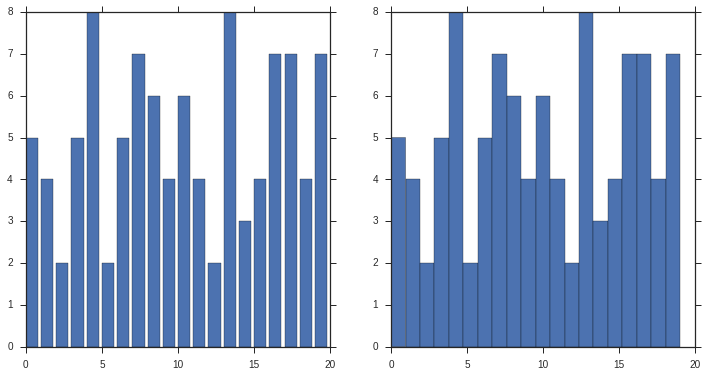

In [23]:
nsize=100
x = np.random.choice(s, size=nsize, replace=True)

## pure numpy histogram, plotting separate
h, bins = np.histogram(x, bins=20, range=[0,20])
print(h)
print(bins)

## pure numpy, with bin edges defined
h2, bins2 = np.histogram(x, bins=np.arange(0,21,1))

## plotting for numpy implementation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), sharey=False)
ax1.bar(bins2[:-1], h2, width=0.8)

## second implementation, plotting while making histogram
h, bins, patches = ax2.hist(x, bins=20)
plt.show()

## Or instead of the previous two lines, defining bin edges directly works too!
#h, bins, patches = ax2.hist(x, bins=np.arange(0,21,1))
#plt.show()

### Playing cards in Python

Making R style data frames in pure Python (or a combination of numpy/scipy) is hard. This
can sort of be done using structured array and the `dtypes` object. `dtypes` allows one to define a
name and the type of number (`int`, `float`, ...) that is being stored in the array. In the code below,
we make a structured array where each column corresponds to a certain suit and contains 13
cards. In general, we would advise you to keep data structures as simple as possible. You may
also want to look at the package astropy and associated submodule `astropy.table`.

In [24]:
## pure numpy/scipy implementation
face = np.arange(1,14,1)

## define the column names
suit = ["heart", "diamond", "spade", "club"]

## define the type of variable in each column
types = ["float64" for i in range(len(suit))]

## define a structured numpy array
cards = np.array(face, dtype={'names':suit, 'formats':types})

## this is how you call the entire suit "heart" or the second card in the suit "diamonds"
print(cards["heart"])
print(cards["diamond"][1])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]
2.0


A more elegant option would be to use pandas to achieve the same thing, either by directly
defining a pandas `DataFrame` or reading it from a dictionary.

In [25]:
d = {'heart' : pd.Series(np.arange(1,14,1), index=range(13)),
'diamond' : pd.Series(np.arange(1,14,1), index=range(13)),
'spade' : pd.Series(np.arange(1,14,1), index=range(13)),
'club' : pd.Series(np.arange(1,14,1), index=range(13)), }

cards_df = pd.DataFrame(d)
colour = cards_df
colour

,club,diamond,heart,spade
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5
5,6,6,6,6
6,7,7,7,7
7,8,8,8,8
8,9,9,9,9
9,10,10,10,10
